In [1]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from tqdm import tqdm
import datetime
from matplotlib import pyplot as plt

%matplotlib inline
%run ./data_loading.ipynb

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5, stride=1, padding=0)

        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1 = nn.Linear(in_features=10*10*12, out_features=300)
        self.fc2 = nn.Linear(in_features=300, out_features=60)
        self.fc3 = nn.Linear(in_features=60, out_features=9)
        
    def forward(self, X):
        X = self.pool(self.relu(self.conv1(X)))
        X = self.pool(self.relu(self.conv2(X)))
        X = X.view(-1, 10*10*12)
        X = self.relu(self.fc1(X))
        X = self.relu(self.fc2(X))
        X = self.fc3(X)
        return X

In [3]:
net = Net().float()
if torch.cuda.is_available():
    net = net.cuda()
loss_f = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)

In [4]:
# Dividing data into 30% train, 40% val, 30% test
cr_train = ClassroomDataset(range_10=[0,5])
cr_val = ClassroomDataset(range_10=[5,7])
cr_test = ClassroomDataset(range_10=[7,10])

In [5]:
def calculate_accuracy(dataloader):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in tqdm(dataloader):
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100 * correct / total
    return acc

In [6]:
def train(dataset, epochs, batch_size=5, to_cuda=True, calculate_acc=False):
    train_acc = []
    val_acc = []
    if to_cuda:
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
    else:
        dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    for epoch in range(epochs):
        running_loss = 0.0
        for i, data in tqdm(enumerate(dataloader, 0)):
            inputs, labels = data
            if to_cuda:
                inputs = inputs.cuda()
                labels = labels.cuda()

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = loss_f(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
        print('epoch:', epoch, ', loss:', running_loss * batch_size / dataloader.__len__())
        if calculate_acc:
            t = calculate_accuracy(dataloader)
            v = calculate_accuracy(val_loader)
            print("train acc:", t, "val acc:", v)
            train_acc.append(t)
            val_acc.append(v)
        if epoch % 1 == 0: # every x epochs reshuffle data by creating a new loader
            if to_cuda:
                dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
            else:
                dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    return train_acc, val_acc

In [7]:
val_loader = DataLoader(cr_val, batch_size=1, shuffle=True)

In [8]:
train_accuracy, val_accuracy = train(cr_train, to_cuda=False, epochs=100, calculate_acc=True)

640it [00:03, 164.71it/s]
  8%|▊         | 53/640 [00:00<00:01, 522.87it/s]

epoch: 0 , loss: 7.917245858232491


100%|██████████| 1280/1280 [00:02<00:00, 558.85it/s]
19it [00:00, 188.86it/s]

train acc: 73.28125 val acc: 72.34375


640it [00:03, 186.17it/s]
 10%|█         | 65/640 [00:00<00:00, 640.96it/s]

epoch: 1 , loss: 3.420322309495532


100%|██████████| 1280/1280 [00:02<00:00, 574.10it/s]
15it [00:00, 146.48it/s]

train acc: 84.03125 val acc: 80.78125


640it [00:04, 159.26it/s]
 10%|█         | 65/640 [00:00<00:00, 644.14it/s]

epoch: 2 , loss: 2.5195165517534406


100%|██████████| 1280/1280 [00:01<00:00, 686.73it/s]
22it [00:00, 213.26it/s]

train acc: 88.09375 val acc: 85.703125


640it [00:03, 210.75it/s]
  9%|▊         | 55/640 [00:00<00:01, 548.22it/s]

epoch: 3 , loss: 2.0242391904666874


100%|██████████| 1280/1280 [00:02<00:00, 548.96it/s]
15it [00:00, 148.55it/s]

train acc: 89.0 val acc: 85.546875


640it [00:04, 159.92it/s]
 10%|█         | 65/640 [00:00<00:00, 649.81it/s]

epoch: 4 , loss: 1.6216540923319371


100%|██████████| 1280/1280 [00:02<00:00, 617.06it/s]
16it [00:00, 154.10it/s]

train acc: 91.90625 val acc: 87.5


640it [00:04, 156.19it/s]
  8%|▊         | 53/640 [00:00<00:01, 527.78it/s]

epoch: 5 , loss: 1.2309556371709505


100%|██████████| 1280/1280 [00:01<00:00, 643.35it/s]
19it [00:00, 180.01it/s]

train acc: 94.6875 val acc: 89.0625


640it [00:03, 163.53it/s]
  8%|▊         | 50/640 [00:00<00:01, 492.60it/s]

epoch: 6 , loss: 1.0093069126139085


100%|██████████| 1280/1280 [00:02<00:00, 579.50it/s]
19it [00:00, 183.22it/s]

train acc: 94.8125 val acc: 89.21875


640it [00:03, 193.07it/s]
 10%|█         | 66/640 [00:00<00:00, 650.26it/s]

epoch: 7 , loss: 0.7555604883328897


100%|██████████| 1280/1280 [00:02<00:00, 559.36it/s]
16it [00:00, 152.79it/s]

train acc: 96.4375 val acc: 90.703125


640it [00:04, 156.87it/s]
  8%|▊         | 54/640 [00:00<00:01, 535.85it/s]

epoch: 8 , loss: 0.5698497145242705


100%|██████████| 1280/1280 [00:01<00:00, 657.17it/s]
16it [00:00, 151.60it/s]

train acc: 98.03125 val acc: 90.9375


640it [00:04, 145.57it/s]
  8%|▊         | 50/640 [00:00<00:01, 494.04it/s]

epoch: 9 , loss: 0.42603648253164117


100%|██████████| 1280/1280 [00:01<00:00, 644.76it/s]
20it [00:00, 198.86it/s]

train acc: 96.40625 val acc: 89.765625


640it [00:03, 176.18it/s]
  8%|▊         | 53/640 [00:00<00:01, 522.28it/s]

epoch: 10 , loss: 0.47310558230234534


100%|██████████| 1280/1280 [00:02<00:00, 565.41it/s]
15it [00:00, 148.10it/s]

train acc: 97.0 val acc: 89.53125


640it [00:03, 184.79it/s]
 10%|▉         | 63/640 [00:00<00:00, 620.69it/s]

epoch: 11 , loss: 0.2588874798463836


100%|██████████| 1280/1280 [00:02<00:00, 569.22it/s]
15it [00:00, 145.78it/s]

train acc: 99.21875 val acc: 91.71875


640it [00:04, 148.95it/s]
  9%|▉         | 56/640 [00:00<00:01, 550.23it/s]

epoch: 12 , loss: 0.2262570507563164


100%|██████████| 1280/1280 [00:01<00:00, 677.87it/s]
20it [00:00, 199.91it/s]

train acc: 99.375 val acc: 91.640625


640it [00:03, 160.05it/s]
  8%|▊         | 52/640 [00:00<00:01, 510.12it/s]

epoch: 13 , loss: 0.16430891333675923


100%|██████████| 1280/1280 [00:02<00:00, 611.36it/s]
18it [00:00, 176.96it/s]

train acc: 99.65625 val acc: 92.5


640it [00:03, 186.05it/s]
  8%|▊         | 53/640 [00:00<00:01, 524.66it/s]

epoch: 14 , loss: 0.10722656181123735


100%|██████████| 1280/1280 [00:02<00:00, 564.99it/s]
16it [00:00, 150.31it/s]

train acc: 99.84375 val acc: 91.25


640it [00:03, 161.98it/s]
 10%|█         | 65/640 [00:00<00:00, 645.48it/s]

epoch: 15 , loss: 0.06811588038284744


100%|██████████| 1280/1280 [00:02<00:00, 610.58it/s]
16it [00:00, 154.29it/s]

train acc: 99.84375 val acc: 91.171875


640it [00:04, 155.59it/s]
  8%|▊         | 54/640 [00:00<00:01, 535.25it/s]

epoch: 16 , loss: 0.05058119580894771


100%|██████████| 1280/1280 [00:01<00:00, 643.96it/s]
21it [00:00, 200.37it/s]

train acc: 99.875 val acc: 91.640625


640it [00:03, 163.48it/s]
  8%|▊         | 50/640 [00:00<00:01, 492.93it/s]

epoch: 17 , loss: 0.03877978405967997


100%|██████████| 1280/1280 [00:02<00:00, 581.68it/s]
19it [00:00, 185.02it/s]

train acc: 99.96875 val acc: 92.03125


640it [00:03, 188.51it/s]
 10%|▉         | 62/640 [00:00<00:00, 617.84it/s]

epoch: 18 , loss: 0.030624134737924025


100%|██████████| 1280/1280 [00:02<00:00, 564.16it/s]
16it [00:00, 159.21it/s]

train acc: 99.96875 val acc: 91.640625


640it [00:04, 156.12it/s]
 10%|█         | 64/640 [00:00<00:00, 635.21it/s]

epoch: 19 , loss: 0.022180157899216235


100%|██████████| 1280/1280 [00:02<00:00, 599.84it/s]
15it [00:00, 149.30it/s]

train acc: 99.90625 val acc: 91.5625


640it [00:04, 143.11it/s]
  8%|▊         | 48/640 [00:00<00:01, 479.68it/s]

epoch: 20 , loss: 0.023758588170607498


100%|██████████| 1280/1280 [00:01<00:00, 646.33it/s]
20it [00:00, 197.25it/s]

train acc: 99.96875 val acc: 91.875


640it [00:04, 156.23it/s]
  8%|▊         | 51/640 [00:00<00:01, 504.75it/s]

epoch: 21 , loss: 0.01817114974648626


100%|██████████| 1280/1280 [00:02<00:00, 583.70it/s]
19it [00:00, 187.83it/s]

train acc: 99.96875 val acc: 92.03125


640it [00:03, 185.58it/s]
  8%|▊         | 53/640 [00:00<00:01, 509.89it/s]

epoch: 22 , loss: 0.017683834448354085


100%|██████████| 1280/1280 [00:02<00:00, 606.36it/s]
16it [00:00, 155.69it/s]

train acc: 99.96875 val acc: 91.5625


640it [00:03, 183.94it/s]
 12%|█▏        | 76/640 [00:00<00:00, 753.34it/s]

epoch: 23 , loss: 0.015623764524978156


100%|██████████| 1280/1280 [00:01<00:00, 746.80it/s]
22it [00:00, 219.83it/s]

train acc: 99.9375 val acc: 91.40625


640it [00:02, 219.29it/s]
 10%|█         | 66/640 [00:00<00:00, 657.36it/s]

epoch: 24 , loss: 0.016278464957889538


100%|██████████| 1280/1280 [00:01<00:00, 705.23it/s]
22it [00:00, 210.97it/s]

train acc: 99.96875 val acc: 91.5625


640it [00:02, 215.80it/s]
 15%|█▌        | 98/640 [00:00<00:00, 973.11it/s]

epoch: 25 , loss: 0.015227213666312744


100%|██████████| 1280/1280 [00:01<00:00, 1070.30it/s]
28it [00:00, 277.49it/s]

train acc: 99.9375 val acc: 91.25


640it [00:02, 264.66it/s]
 15%|█▌        | 98/640 [00:00<00:00, 974.08it/s]

epoch: 26 , loss: 0.01226532940920344


100%|██████████| 1280/1280 [00:01<00:00, 1002.52it/s]
27it [00:00, 265.16it/s]

train acc: 99.96875 val acc: 91.71875


640it [00:02, 261.52it/s]
 15%|█▍        | 95/640 [00:00<00:00, 941.68it/s]

epoch: 27 , loss: 0.011340002021657414


100%|██████████| 1280/1280 [00:01<00:00, 983.61it/s]
29it [00:00, 284.47it/s]

train acc: 99.96875 val acc: 91.875


640it [00:02, 261.98it/s]
 14%|█▍        | 91/640 [00:00<00:00, 899.65it/s]

epoch: 28 , loss: 0.009452605620100085


100%|██████████| 1280/1280 [00:01<00:00, 1054.03it/s]
26it [00:00, 258.01it/s]

train acc: 100.0 val acc: 91.640625


640it [00:02, 255.33it/s]
 15%|█▍        | 95/640 [00:00<00:00, 949.42it/s]

epoch: 29 , loss: 0.008489812500995786


100%|██████████| 1280/1280 [00:01<00:00, 954.10it/s]
27it [00:00, 266.94it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 254.87it/s]
 16%|█▋        | 104/640 [00:00<00:00, 1039.11it/s]

epoch: 30 , loss: 0.00915052707279429


100%|██████████| 1280/1280 [00:01<00:00, 990.13it/s] 
28it [00:00, 272.93it/s]

train acc: 99.96875 val acc: 91.5625


640it [00:02, 253.26it/s]
 15%|█▌        | 99/640 [00:00<00:00, 985.24it/s]

epoch: 31 , loss: 0.00740171712601656


100%|██████████| 1280/1280 [00:01<00:00, 1036.77it/s]
29it [00:00, 283.31it/s]

train acc: 99.96875 val acc: 91.640625


640it [00:02, 253.04it/s]
 15%|█▍        | 94/640 [00:00<00:00, 936.80it/s]

epoch: 32 , loss: 0.009011211721486667


100%|██████████| 1280/1280 [00:01<00:00, 1003.85it/s]
26it [00:00, 256.47it/s]

train acc: 99.96875 val acc: 91.640625


640it [00:02, 257.60it/s]
 15%|█▌        | 98/640 [00:00<00:00, 972.68it/s]

epoch: 33 , loss: 0.00640824732232903


100%|██████████| 1280/1280 [00:01<00:00, 930.06it/s] 
27it [00:00, 264.85it/s]

train acc: 99.96875 val acc: 91.5625


640it [00:02, 260.52it/s]
 16%|█▌        | 102/640 [00:00<00:00, 1011.68it/s]

epoch: 34 , loss: 0.006163699854776938


100%|██████████| 1280/1280 [00:01<00:00, 1005.73it/s]
27it [00:00, 267.13it/s]

train acc: 99.96875 val acc: 91.5625


640it [00:02, 239.36it/s]
 15%|█▌        | 98/640 [00:00<00:00, 972.36it/s]

epoch: 35 , loss: 0.008897456204147947


100%|██████████| 1280/1280 [00:01<00:00, 1037.17it/s]
28it [00:00, 272.44it/s]

train acc: 99.96875 val acc: 91.71875


640it [00:02, 266.06it/s]
 16%|█▋        | 105/640 [00:00<00:00, 1049.65it/s]

epoch: 36 , loss: 0.010038152995493821


100%|██████████| 1280/1280 [00:01<00:00, 1016.31it/s]
27it [00:00, 269.91it/s]

train acc: 100.0 val acc: 91.640625


640it [00:02, 256.57it/s]
 13%|█▎        | 85/640 [00:00<00:00, 839.96it/s]

epoch: 37 , loss: 0.004650882657367017


100%|██████████| 1280/1280 [00:01<00:00, 983.28it/s] 
27it [00:00, 264.24it/s]

train acc: 100.0 val acc: 91.640625


640it [00:02, 259.38it/s]
 15%|█▌        | 97/640 [00:00<00:00, 952.86it/s]

epoch: 38 , loss: 0.004683510989644812


100%|██████████| 1280/1280 [00:01<00:00, 1020.36it/s]
29it [00:00, 280.77it/s]

train acc: 100.0 val acc: 91.640625


640it [00:02, 258.78it/s]
 15%|█▌        | 99/640 [00:00<00:00, 978.97it/s]

epoch: 39 , loss: 0.00447759254783886


100%|██████████| 1280/1280 [00:01<00:00, 994.70it/s] 
27it [00:00, 262.43it/s]

train acc: 100.0 val acc: 91.5625


640it [00:02, 254.45it/s]
 13%|█▎        | 84/640 [00:00<00:00, 832.99it/s]

epoch: 40 , loss: 0.0042081560690254705


100%|██████████| 1280/1280 [00:01<00:00, 971.79it/s]
26it [00:00, 259.30it/s]

train acc: 100.0 val acc: 91.640625


640it [00:02, 264.00it/s]
 15%|█▌        | 97/640 [00:00<00:00, 956.17it/s]

epoch: 41 , loss: 0.003367715355444334


100%|██████████| 1280/1280 [00:01<00:00, 1029.71it/s]
26it [00:00, 259.11it/s]

train acc: 100.0 val acc: 91.640625


640it [00:02, 253.51it/s]
 14%|█▍        | 89/640 [00:00<00:00, 875.19it/s]

epoch: 42 , loss: 0.0035442612973219934


100%|██████████| 1280/1280 [00:01<00:00, 1017.06it/s]
29it [00:00, 286.97it/s]

train acc: 100.0 val acc: 91.640625


640it [00:02, 260.53it/s]
 15%|█▌        | 97/640 [00:00<00:00, 965.26it/s]

epoch: 43 , loss: 0.002875204391624031


100%|██████████| 1280/1280 [00:01<00:00, 1035.51it/s]
29it [00:00, 282.58it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 258.03it/s]
 17%|█▋        | 107/640 [00:00<00:00, 1069.98it/s]

epoch: 44 , loss: 0.0028077527674437164


100%|██████████| 1280/1280 [00:01<00:00, 1052.08it/s]
29it [00:00, 281.77it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 261.09it/s]
 14%|█▎        | 87/640 [00:00<00:00, 864.34it/s]

epoch: 45 , loss: 0.0028810583321983163


100%|██████████| 1280/1280 [00:01<00:00, 1019.28it/s]
27it [00:00, 257.78it/s]

train acc: 99.96875 val acc: 91.484375


640it [00:02, 248.38it/s]
 14%|█▎        | 87/640 [00:00<00:00, 867.72it/s]

epoch: 46 , loss: 0.0032264396340546675


100%|██████████| 1280/1280 [00:01<00:00, 1028.12it/s]
27it [00:00, 263.27it/s]

train acc: 99.96875 val acc: 91.484375


640it [00:02, 255.89it/s]
 13%|█▎        | 86/640 [00:00<00:00, 856.30it/s]

epoch: 47 , loss: 0.005256605143053816


100%|██████████| 1280/1280 [00:01<00:00, 984.57it/s]
26it [00:00, 259.00it/s]

train acc: 99.96875 val acc: 91.484375


640it [00:02, 257.83it/s]
 15%|█▍        | 93/640 [00:00<00:00, 923.78it/s]

epoch: 48 , loss: 0.005526579646249585


100%|██████████| 1280/1280 [00:01<00:00, 1019.25it/s]
29it [00:00, 287.65it/s]

train acc: 99.96875 val acc: 91.484375


640it [00:02, 265.45it/s]
 16%|█▌        | 100/640 [00:00<00:00, 996.13it/s]

epoch: 49 , loss: 0.003293248957837669


100%|██████████| 1280/1280 [00:01<00:00, 1000.43it/s]
28it [00:00, 278.59it/s]

train acc: 100.0 val acc: 91.328125


640it [00:02, 258.23it/s]
 15%|█▍        | 95/640 [00:00<00:00, 943.24it/s]

epoch: 50 , loss: 0.002440439939918937


100%|██████████| 1280/1280 [00:01<00:00, 990.37it/s]
27it [00:00, 267.54it/s]

train acc: 100.0 val acc: 91.5625


640it [00:02, 256.98it/s]
 13%|█▎        | 84/640 [00:00<00:00, 830.02it/s]

epoch: 51 , loss: 0.0020433477911037112


100%|██████████| 1280/1280 [00:01<00:00, 1012.19it/s]
24it [00:00, 238.54it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 253.86it/s]
 15%|█▌        | 98/640 [00:00<00:00, 978.43it/s]

epoch: 52 , loss: 0.0017854005060793376


100%|██████████| 1280/1280 [00:01<00:00, 1017.27it/s]
29it [00:00, 287.45it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 259.65it/s]
 14%|█▎        | 87/640 [00:00<00:00, 866.02it/s]

epoch: 53 , loss: 0.0016808301350124122


100%|██████████| 1280/1280 [00:01<00:00, 997.38it/s]
30it [00:00, 293.13it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 254.92it/s]
 14%|█▍        | 92/640 [00:00<00:00, 919.56it/s]

epoch: 54 , loss: 0.0015904061508014156


100%|██████████| 1280/1280 [00:01<00:00, 989.40it/s]
28it [00:00, 273.74it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 259.88it/s]
 15%|█▍        | 93/640 [00:00<00:00, 926.09it/s]

epoch: 55 , loss: 0.0015151679478926372


100%|██████████| 1280/1280 [00:01<00:00, 1036.63it/s]
26it [00:00, 258.73it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 259.53it/s]
 14%|█▍        | 90/640 [00:00<00:00, 899.26it/s]

epoch: 56 , loss: 0.0014476649504404637


100%|██████████| 1280/1280 [00:01<00:00, 992.98it/s] 
27it [00:00, 264.24it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 259.28it/s]
 15%|█▍        | 93/640 [00:00<00:00, 921.58it/s]

epoch: 57 , loss: 0.0013849787469915054


100%|██████████| 1280/1280 [00:01<00:00, 994.57it/s]
26it [00:00, 247.05it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 259.77it/s]
 15%|█▍        | 95/640 [00:00<00:00, 949.18it/s]

epoch: 58 , loss: 0.001332646608397603


100%|██████████| 1280/1280 [00:01<00:00, 983.07it/s] 
27it [00:00, 262.71it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 259.31it/s]
 16%|█▌        | 101/640 [00:00<00:00, 1009.27it/s]

epoch: 59 , loss: 0.0012790210537154678


100%|██████████| 1280/1280 [00:01<00:00, 1029.05it/s]
25it [00:00, 249.96it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 263.21it/s]
 16%|█▌        | 100/640 [00:00<00:00, 999.41it/s]

epoch: 60 , loss: 0.0012325003717945648


100%|██████████| 1280/1280 [00:01<00:00, 985.68it/s]
26it [00:00, 259.28it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 257.75it/s]
 13%|█▎        | 81/640 [00:00<00:00, 804.98it/s]

epoch: 61 , loss: 0.0011841930425573466


100%|██████████| 1280/1280 [00:01<00:00, 986.28it/s] 
29it [00:00, 287.41it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 254.52it/s]
 16%|█▋        | 104/640 [00:00<00:00, 1031.27it/s]

epoch: 62 , loss: 0.0011453516811421594


100%|██████████| 1280/1280 [00:01<00:00, 1016.28it/s]
28it [00:00, 278.20it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 260.54it/s]
 15%|█▍        | 93/640 [00:00<00:00, 921.17it/s]

epoch: 63 , loss: 0.0011070445188643419


100%|██████████| 1280/1280 [00:01<00:00, 971.81it/s]
28it [00:00, 276.38it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 263.11it/s]
 15%|█▌        | 97/640 [00:00<00:00, 967.71it/s]

epoch: 64 , loss: 0.0010714873699160243


100%|██████████| 1280/1280 [00:01<00:00, 1014.20it/s]
29it [00:00, 281.10it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 259.78it/s]
 16%|█▌        | 100/640 [00:00<00:00, 996.86it/s]

epoch: 65 , loss: 0.0010367989567294789


100%|██████████| 1280/1280 [00:01<00:00, 1042.77it/s]
27it [00:00, 267.70it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 258.55it/s]
 17%|█▋        | 108/640 [00:00<00:00, 1070.21it/s]

epoch: 66 , loss: 0.0010037794708614989


100%|██████████| 1280/1280 [00:01<00:00, 1001.12it/s]
27it [00:00, 266.34it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 257.69it/s]
 14%|█▍        | 90/640 [00:00<00:00, 895.04it/s]

epoch: 67 , loss: 0.0009761281290920909


100%|██████████| 1280/1280 [00:01<00:00, 995.42it/s]
28it [00:00, 278.92it/s]

train acc: 100.0 val acc: 91.484375


640it [00:02, 260.94it/s]
 14%|█▍        | 89/640 [00:00<00:00, 883.78it/s]

epoch: 68 , loss: 0.0009479276774306822


100%|██████████| 1280/1280 [00:01<00:00, 1007.88it/s]
28it [00:00, 278.07it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 253.46it/s]
 14%|█▍        | 91/640 [00:00<00:00, 907.43it/s]

epoch: 69 , loss: 0.0009222201993905887


100%|██████████| 1280/1280 [00:01<00:00, 982.64it/s]
27it [00:00, 257.90it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 257.91it/s]
 17%|█▋        | 106/640 [00:00<00:00, 1054.05it/s]

epoch: 70 , loss: 0.0008956834630522437


100%|██████████| 1280/1280 [00:01<00:00, 1015.98it/s]
26it [00:00, 257.84it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 261.51it/s]
 15%|█▌        | 99/640 [00:00<00:00, 986.30it/s]

epoch: 71 , loss: 0.0008715346421652725


100%|██████████| 1280/1280 [00:01<00:00, 1019.46it/s]
26it [00:00, 257.48it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 259.55it/s]
 15%|█▌        | 99/640 [00:00<00:00, 987.85it/s]

epoch: 72 , loss: 0.0008500732477583206


100%|██████████| 1280/1280 [00:01<00:00, 998.87it/s]
27it [00:00, 265.87it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 254.08it/s]
 10%|█         | 65/640 [00:00<00:00, 647.16it/s]

epoch: 73 , loss: 0.0008286923194535945


100%|██████████| 1280/1280 [00:01<00:00, 1022.66it/s]
27it [00:00, 264.10it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 259.43it/s]
 15%|█▍        | 94/640 [00:00<00:00, 929.68it/s]

epoch: 74 , loss: 0.0008068583912579363


100%|██████████| 1280/1280 [00:01<00:00, 1024.03it/s]
27it [00:00, 263.60it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 257.78it/s]
 15%|█▍        | 94/640 [00:00<00:00, 938.33it/s]

epoch: 75 , loss: 0.0007869288312234435


100%|██████████| 1280/1280 [00:01<00:00, 1018.65it/s]
29it [00:00, 283.29it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 261.08it/s]
 14%|█▍        | 90/640 [00:00<00:00, 899.52it/s]

epoch: 76 , loss: 0.0007678315050985152


100%|██████████| 1280/1280 [00:01<00:00, 996.82it/s] 
24it [00:00, 237.24it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 260.26it/s]
 14%|█▍        | 91/640 [00:00<00:00, 903.45it/s]

epoch: 77 , loss: 0.0007505819128330593


100%|██████████| 1280/1280 [00:01<00:00, 1027.30it/s]
26it [00:00, 254.31it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 256.79it/s]
 14%|█▍        | 90/640 [00:00<00:00, 887.82it/s]

epoch: 78 , loss: 0.0007336035329219559


100%|██████████| 1280/1280 [00:01<00:00, 1045.08it/s]
26it [00:00, 256.83it/s]

train acc: 100.0 val acc: 91.40625


640it [00:02, 250.58it/s]
  8%|▊         | 53/640 [00:00<00:01, 527.83it/s]

epoch: 79 , loss: 0.0007170498364390543


100%|██████████| 1280/1280 [00:02<00:00, 568.76it/s]
16it [00:00, 145.97it/s]

train acc: 100.0 val acc: 91.40625


640it [00:03, 163.29it/s]
 10%|█         | 64/640 [00:00<00:00, 639.50it/s]

epoch: 80 , loss: 0.0007013820081613886


100%|██████████| 1280/1280 [00:02<00:00, 630.63it/s]
15it [00:00, 146.36it/s]

train acc: 100.0 val acc: 91.40625


640it [00:04, 155.65it/s]
  8%|▊         | 53/640 [00:00<00:01, 523.70it/s]

epoch: 81 , loss: 0.0006867915408323988


100%|██████████| 1280/1280 [00:01<00:00, 648.41it/s]
20it [00:00, 197.42it/s]

train acc: 100.0 val acc: 91.40625


640it [00:03, 181.99it/s]
  8%|▊         | 53/640 [00:00<00:01, 527.97it/s]

epoch: 82 , loss: 0.0006718851619174071


100%|██████████| 1280/1280 [00:02<00:00, 580.50it/s]
16it [00:00, 151.12it/s]

train acc: 100.0 val acc: 91.40625


640it [00:03, 175.83it/s]
 10%|█         | 65/640 [00:00<00:00, 643.21it/s]

epoch: 83 , loss: 0.0006581850388542865


100%|██████████| 1280/1280 [00:01<00:00, 641.64it/s]
18it [00:00, 171.32it/s]

train acc: 100.0 val acc: 91.25


640it [00:03, 165.77it/s]
  9%|▉         | 56/640 [00:00<00:01, 559.04it/s]

epoch: 84 , loss: 0.000644244998943222


100%|██████████| 1280/1280 [00:02<00:00, 600.04it/s]
18it [00:00, 170.48it/s]

train acc: 100.0 val acc: 91.328125


640it [00:03, 161.76it/s]
  8%|▊         | 52/640 [00:00<00:01, 519.02it/s]

epoch: 85 , loss: 0.0006314560774363098


100%|██████████| 1280/1280 [00:02<00:00, 600.79it/s]
17it [00:00, 162.66it/s]

train acc: 100.0 val acc: 91.40625


640it [00:04, 153.48it/s]
  8%|▊         | 52/640 [00:00<00:01, 519.10it/s]

epoch: 86 , loss: 0.0006189435740127092


100%|██████████| 1280/1280 [00:02<00:00, 586.10it/s]
17it [00:00, 165.69it/s]

train acc: 100.0 val acc: 91.40625


640it [00:04, 154.44it/s]
  8%|▊         | 54/640 [00:00<00:01, 536.36it/s]

epoch: 87 , loss: 0.0006068475546769925


100%|██████████| 1280/1280 [00:02<00:00, 586.15it/s]
17it [00:00, 162.20it/s]

train acc: 100.0 val acc: 91.328125


640it [00:04, 152.12it/s]
  8%|▊         | 51/640 [00:00<00:01, 505.67it/s]

epoch: 88 , loss: 0.0005952596676460642


100%|██████████| 1280/1280 [00:02<00:00, 579.99it/s]
15it [00:00, 147.19it/s]

train acc: 100.0 val acc: 91.25


640it [00:04, 156.03it/s]
  9%|▊         | 55/640 [00:00<00:01, 546.98it/s]

epoch: 89 , loss: 0.000583991410864737


100%|██████████| 1280/1280 [00:02<00:00, 581.11it/s]
17it [00:00, 161.29it/s]

train acc: 100.0 val acc: 91.328125


640it [00:04, 152.60it/s]
  9%|▉         | 59/640 [00:00<00:00, 581.37it/s]

epoch: 90 , loss: 0.0005728021262763061


100%|██████████| 1280/1280 [00:02<00:00, 586.35it/s]
17it [00:00, 165.35it/s]

train acc: 100.0 val acc: 91.328125


640it [00:04, 151.28it/s]
  8%|▊         | 50/640 [00:00<00:01, 494.88it/s]

epoch: 91 , loss: 0.0005626834940883896


100%|██████████| 1280/1280 [00:02<00:00, 564.66it/s]
19it [00:00, 189.15it/s]

train acc: 100.0 val acc: 91.328125


640it [00:03, 184.70it/s]
 10%|▉         | 63/640 [00:00<00:00, 624.68it/s]

epoch: 92 , loss: 0.0005524493761475124


100%|██████████| 1280/1280 [00:02<00:00, 556.71it/s]
15it [00:00, 147.83it/s]

train acc: 100.0 val acc: 91.25


640it [00:04, 157.98it/s]
 10%|█         | 64/640 [00:00<00:00, 630.68it/s]

epoch: 93 , loss: 0.0005424305809621499


100%|██████████| 1280/1280 [00:02<00:00, 606.22it/s]
15it [00:00, 149.81it/s]

train acc: 100.0 val acc: 91.328125


640it [00:04, 145.11it/s]
  8%|▊         | 53/640 [00:00<00:01, 521.25it/s]

epoch: 94 , loss: 0.0005325876183546185


100%|██████████| 1280/1280 [00:02<00:00, 636.51it/s]
21it [00:00, 206.50it/s]

train acc: 100.0 val acc: 91.25


640it [00:03, 167.89it/s]
  9%|▊         | 55/640 [00:00<00:01, 544.46it/s]

epoch: 95 , loss: 0.0005237311142782808


100%|██████████| 1280/1280 [00:02<00:00, 584.36it/s]
16it [00:00, 159.12it/s]

train acc: 100.0 val acc: 91.328125


640it [00:04, 153.32it/s]
  8%|▊         | 53/640 [00:00<00:01, 525.10it/s]

epoch: 96 , loss: 0.0005148373551324692


100%|██████████| 1280/1280 [00:02<00:00, 594.76it/s]
16it [00:00, 154.72it/s]

train acc: 100.0 val acc: 91.328125


640it [00:04, 154.68it/s]
  8%|▊         | 54/640 [00:00<00:01, 539.53it/s]

epoch: 97 , loss: 0.0005059279494934454


100%|██████████| 1280/1280 [00:02<00:00, 585.61it/s]
17it [00:00, 159.72it/s]

train acc: 100.0 val acc: 91.25


640it [00:04, 152.80it/s]
  8%|▊         | 53/640 [00:00<00:01, 525.43it/s]

epoch: 98 , loss: 0.0004971832022695466


100%|██████████| 1280/1280 [00:02<00:00, 591.71it/s]
16it [00:00, 158.58it/s]

train acc: 100.0 val acc: 91.40625


640it [00:04, 159.52it/s]
  8%|▊         | 54/640 [00:00<00:01, 530.35it/s]

epoch: 99 , loss: 0.0004894219336784023


100%|██████████| 1280/1280 [00:02<00:00, 567.78it/s]

train acc: 100.0 val acc: 91.328125


In [9]:
p = "weights/" + str(datetime.datetime.now()).split(".")[0].replace(':','_') + ".pth"
torch.save(net.state_dict(), p)

In [10]:
def class_wise_accuracy(dataloader):
    correct = {}
    total = {}
    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            for l in range(len(labels)):
                label = int(labels[l].cpu().numpy())
                pred = predicted[l]
                if label in correct:
                    correct[label] += int(pred == label)
                    total[label] += 1
                else:
                    correct[label] = int(pred == label)
                    total[label] = 1
    acc = {}
    for label in correct:
        acc[label] = 100 * correct[label] / total[label]
    return acc

In [11]:
class_wise_accuracy(val_loader)

{8: 88.95705521472392,
 1: 90.50632911392405,
 3: 94.19354838709677,
 5: 90.79754601226993,
 2: 92.02453987730061,
 4: 91.9753086419753,
 6: 90.50632911392405,
 7: 91.77215189873418}

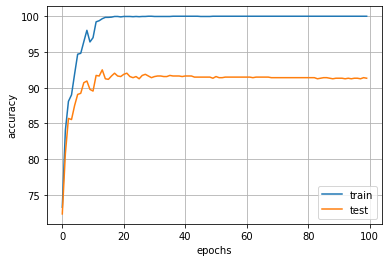

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(np.arange(len(train_accuracy)), train_accuracy, label="train")
ax.plot(np.arange(len(val_accuracy)), val_accuracy, label="test")
ax.grid()
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.legend()
# ax.set_facecolor('lightgray')
# ax.set_xlabel('X-axis')
# ax.set_ylabel('Y-axis')
# ax.spines['bottom'].set_color('white')
# ax.spines['top'].set_color('white')
# ax.xaxis.label.set_color('white')
# ax.tick_params(axis='x', colors='white')
# ax.tick_params(axis='y', colors='white')